In [3]:
import numpy as np
import os
import string
import glob
from time import time

from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Model
from keras.preprocessing import image

from google.colab import drive
drive.mount('/content/drive')

def load_file(filepath):

    with open(filepath, 'r') as file:
        return file.read()

def parse_descriptions(text):
    descriptions = {}
    for line in text.split('\n'):
        if len(line) < 2:
            continue
        tokens = line.split()
        image_id = tokens[0].split('.')[0]
        desc = ' '.join(tokens[1:])
        descriptions.setdefault(image_id, []).append(desc)
    return descriptions

def clean_descriptions(descriptions):
    table = str.maketrans('', '', string.punctuation)
    for key, desc_list in descriptions.items():
        for i in range(len(desc_list)):
            words = desc_list[i].split()
            words = [word.lower() for word in words]
            words = [w.translate(table) for w in words]
            words = [word for word in words if len(word) > 1 and word.isalpha()]
            desc_list[i] = ' '.join(words)

def build_vocabulary(descriptions):
    vocab = set()
    for key in descriptions:
        for desc in descriptions[key]:
            vocab.update(desc.split())
    return vocab

def save_descriptions(descriptions, out_filepath):
    lines = []
    for key, desc_list in descriptions.items():
        for desc in desc_list:
            lines.append(key + ' ' + desc)
    with open(out_filepath, 'w') as file:
        file.write('\n'.join(lines))

def load_image_set(filepath):
    text = load_file(filepath)
    return {line.split('.')[0] for line in text.split('\n') if line.strip()}

def load_clean_descriptions(filepath, image_set):
    text = load_file(filepath)
    cleaned_desc = {}
    for line in text.split('\n'):
        tokens = line.split()
        if not tokens:
            continue
        image_id, desc_tokens = tokens[0], tokens[1:]
        if image_id in image_set:
            cleaned_desc.setdefault(image_id, []).append("startseq " + ' '.join(desc_tokens) + " endseq")
    return cleaned_desc

train_set_file = '/content/drive/MyDrive/datasets/Flickr_8k.trainImages.txt'
train_set = load_image_set(train_set_file)
print("Training set size: %d" % len(train_set))

images_folder = '/content/drive/MyDrive/datasets/Flickr_8k_Images/'
all_image_paths = glob.glob(os.path.join(images_folder, '*.jpg'))

train_image_names = set(load_file(train_set_file).strip().split('\n'))
train_image_paths = [path for path in all_image_paths if os.path.basename(path) in train_image_names]

test_set_file = '/content/drive/MyDrive/datasets/Flickr_8k.testImages.txt'
test_names = set(load_file(test_set_file).strip().split('\n'))
test_image_paths = [path for path in all_image_paths if os.path.basename(path) in test_names]

train_descriptions = load_clean_descriptions('/content/drive/MyDrive/datasets/descriptions.txt', train_set)

print("Training descriptions count: %d" % len(train_descriptions))

def preprocess_image(image_path):

    img = image.load_img(image_path, target_size=(299, 299))
    img_arr = image.img_to_array(img)
    img_arr = np.expand_dims(img_arr, axis=0)
    return preprocess_input(img_arr)

base_model = InceptionV3(weights='imagenet')
model_encoder = Model(inputs=base_model.input, outputs=base_model.layers[-2].output)

def encode_image(image_path):
    preprocessed_img = preprocess_image(image_path)
    features = model_encoder.predict(preprocessed_img)
    return np.reshape(features, features.shape[1])

start_time = time()
encoded_train_images = {}

for img_path in train_image_paths:
    img_id = os.path.splitext(os.path.basename(img_path))[0]
    encoded_train_images[img_id] = encode_image(img_path)

print("Encoding time (seconds):", time() - start_time)


Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

In [4]:
import os
import pickle
import numpy as np
from time import time

from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dropout, Dense, LSTM, Embedding, Input, add
from keras.models import Model

with open("/content/drive/MyDrive/datasets/encoded_train_images.pkl", "wb") as f:
    pickle.dump(encoded_train_images, f)

start_time = time()
encoded_test_images = {}
for test_path in test_image_paths:
    key = os.path.splitext(os.path.basename(test_path))[0]
    encoded_test_images[key] = encode_image(test_path)
print("Test encoding time (seconds):", time() - start_time)

with open("/content/drive/MyDrive/datasets/encoded_test_images.pkl", "wb") as f:
    pickle.dump(encoded_test_images, f)

with open("/content/drive/MyDrive/datasets/encoded_train_images.pkl", "rb") as f:
    train_features = pickle.load(f)
print('Training photos count: %d' % len(train_features))

all_captions = []
for key, caps in train_descriptions.items():
    for cap in caps:
        all_captions.append(cap)
print("Total training captions:", len(all_captions))

word_count_threshold = 10
word_counts = {}
for caption in all_captions:
    for word in caption.split(' '):
        word_counts[word] = word_counts.get(word, 0) + 1

vocabulary = [w for w in word_counts if word_counts[w] >= word_count_threshold]
print('Vocabulary size reduction: %d -> %d' % (len(word_counts), len(vocabulary)))

word_to_index = {}
index_to_word = {}
index = 1
for word in vocabulary:
    word_to_index[word] = index
    index_to_word[index] = word
    index += 1

vocab_size = len(word_to_index) + 1
print("Vocabulary size (with padding):", vocab_size)

def convert_descriptions_to_list(descriptions_dict):
    all_lines = []
    for key in descriptions_dict:
        for desc in descriptions_dict[key]:
            all_lines.append(desc)
    return all_lines

def get_max_caption_length(descriptions_dict):
    all_lines = convert_descriptions_to_list(descriptions_dict)
    return max(len(line.split()) for line in all_lines)

max_caption_length = get_max_caption_length(train_descriptions)
print('Maximum caption length:', max_caption_length)


def data_generator(descriptions, photo_features, word2idx, max_len, batch_size):
    X1, X2, y = [], [], []
    batch_counter = 0
    while True:
        for image_id, desc_list in descriptions.items():
            batch_counter += 1
            photo_feat = photo_features.get(image_id)
            if photo_feat is None:
                continue
            for desc in desc_list:
                seq = [word2idx[word] for word in desc.split(' ') if word in word2idx]
                for i in range(1, len(seq)):
                    in_seq = seq[:i]
                    out_seq = seq[i]
                    in_seq = pad_sequences([in_seq], maxlen=max_len, padding='post')[0]
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                    X1.append(photo_feat)
                    X2.append(in_seq)
                    y.append(out_seq)
            if batch_counter == batch_size:
                yield ((np.array(X1), np.array(X2)), np.array(y))

                X1, X2, y = [], [], []
                batch_counter = 0


glove_dir = '/content/drive/MyDrive/datasets/'
embeddings_index = {}
glove_file = os.path.join(glove_dir, 'glove.6B.200d.txt')
with open(glove_file, encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
print('Found {} word vectors.'.format(len(embeddings_index)))

embedding_dim = 200
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, idx in word_to_index.items():
    emb_vector = embeddings_index.get(word)
    if emb_vector is not None:
        embedding_matrix[idx] = emb_vector

img_input = Input(shape=(2048,))
img_dropout = Dropout(0.5)(img_input)
img_dense = Dense(256, activation='relu')(img_dropout)

seq_input = Input(shape=(max_caption_length,))
seq_embedding = Embedding(vocab_size, embedding_dim, mask_zero=True)(seq_input)
seq_dropout = Dropout(0.5)(seq_embedding)
seq_lstm = LSTM(256)(seq_dropout)

decoder = add([img_dense, seq_lstm])
decoder_dense = Dense(256, activation='relu')(decoder)
outputs = Dense(vocab_size, activation='softmax')(decoder_dense)
model = Model(inputs=[img_input, seq_input], outputs=outputs)

model.summary()

model.layers[2].set_weights([embedding_matrix])
model.layers[2].trainable = False

model.compile(loss='categorical_crossentropy', optimizer='adam')


num_epochs = 10
batch_size = 3
steps = len(train_descriptions) // batch_size

for epoch in range(num_epochs):
    generator = data_generator(train_descriptions, train_features, word_to_index, max_caption_length, batch_size)
    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 34)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 2048)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 34, 200)        │        330,400 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 2048)           │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 34, 200)        │              0 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal (NotEqual)      │ (None, 34)             │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 256)            │        524,544 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 256)            │        467,968 │ dropout_1[0][0],       │
│                           │                        │                │ not_equal[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 256)            │              0 │ dense[0][0],           │
│                           │                        │                │ lstm[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 256)            │         65,792 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1652)           │        424,564 │ dense_1[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,813,268 (6.92 MB)

 Trainable params: 1,813,268 (6.92 MB)

 Non-trainable params: 0 (0.00 B)

2000/2000 ━━━━━━━━━━━━━━━━━━━━ 38s 17ms/step - loss: 4.6146


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - loss: 3.5007


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - loss: 3.2466


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 33s 16ms/step - loss: 3.1002


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - loss: 2.9977


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - loss: 2.9198


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - loss: 2.8581


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - loss: 2.8107


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - loss: 2.7674


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - loss: 2.7357


In [6]:
for i in range(num_epochs):
    generator = data_generator(train_descriptions, train_features, word_to_index, max_caption_length, batch_size)

    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

2000/2000 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - loss: 2.7012


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - loss: 2.6750


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - loss: 2.6537


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - loss: 2.6312


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - loss: 2.6148


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - loss: 2.5985


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - loss: 2.5848


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - loss: 2.5680


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 33s 16ms/step - loss: 2.5525


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - loss: 2.5448


In [9]:
model.optimizer.lr = 0.0001
epochs = 10
number_pics_per_bath = 6
steps = len(train_descriptions)//number_pics_per_bath
for i in range(epochs):
    generator = data_generator(train_descriptions, train_features, word_to_index, max_caption_length, number_pics_per_bath)
    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - loss: 2.5270
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - loss: 2.4916
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - loss: 2.4767
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - loss: 2.4618
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - loss: 2.4508
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - loss: 2.4440
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - loss: 2.4310
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - loss: 2.4204
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - loss: 2.4060
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 27s 27ms/step - loss: 2.4047


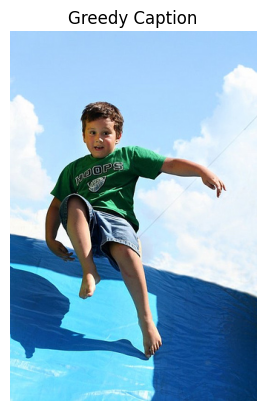

Greedy Caption: young boy in life vest jumps into the air
Loaded test descriptions: 1000
Image ID: 1056338697_4f7d7ce270
Greedy Generated Caption: woman in pink dress and jeans is standing in front of truck
References: ['A blond woman in a blue shirt appears to wait for a ride .', 'A blond woman is on the street hailing a taxi .', 'A woman is signaling is to traffic , as seen from behind .', 'A woman with blonde hair wearing a blue tube top is waving on the side of the street .', 'The woman in the blue dress is holding out her arm at oncoming traffic .']
--------------------------------------------------
Image ID: 106490881_5a2dd9b7bd
Greedy Generated Caption: young boy in swim trunks is jumping into pool
References: ['A boy in his blue swim shorts at the beach .', 'A boy smiles for the camera at a beach .', 'A young boy in swimming trunks is walking with his arms outstretched on the beach .', 'Children playing on the beach .', 'The boy is playing on the shore of an ocean .']
---------

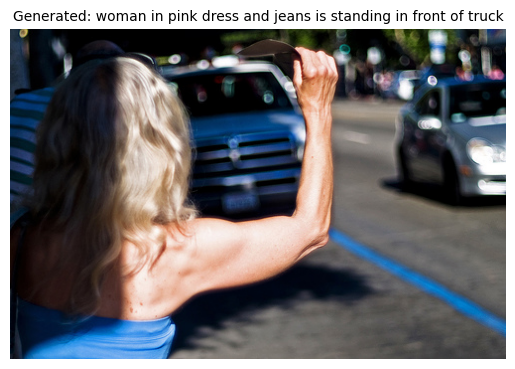

References:
 • A blond woman in a blue shirt appears to wait for a ride .
 • A blond woman is on the street hailing a taxi .
 • A woman is signaling is to traffic , as seen from behind .
 • A woman with blonde hair wearing a blue tube top is waving on the side of the street .
 • The woman in the blue dress is holding out her arm at oncoming traffic .
--------------------------------------------------------------------------------


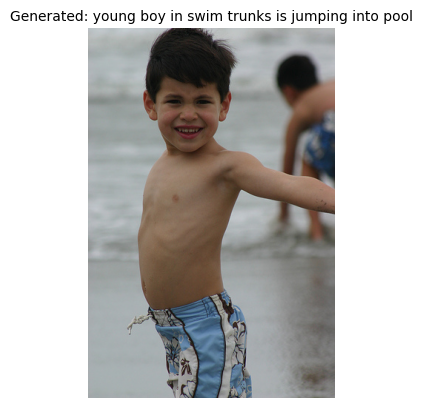

References:
 • A boy in his blue swim shorts at the beach .
 • A boy smiles for the camera at a beach .
 • A young boy in swimming trunks is walking with his arms outstretched on the beach .
 • Children playing on the beach .
 • The boy is playing on the shore of an ocean .
--------------------------------------------------------------------------------


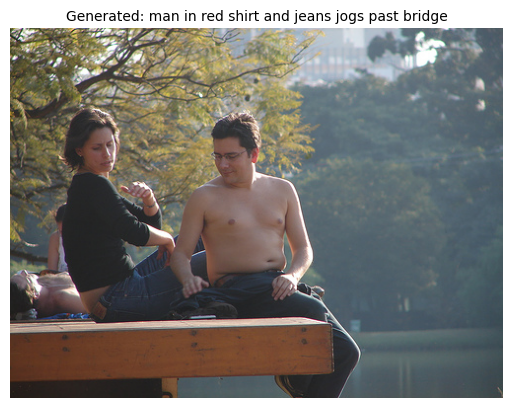

References:
 • A lady and a man with no shirt sit on a dock .
 • A man and a woman are sitting on a dock together .
 • A man and a woman sitting on a dock .
 • A man and woman sitting on a deck next to a lake .
 • A shirtless man and a woman sitting on a dock .
--------------------------------------------------------------------------------


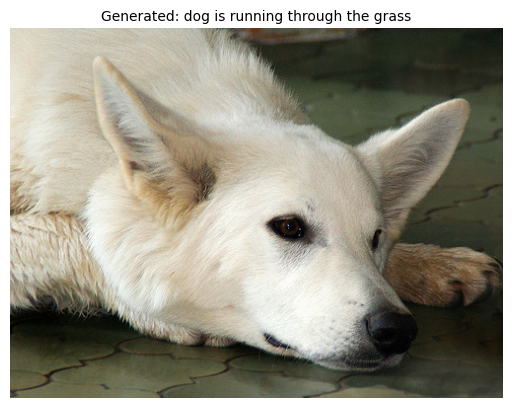

References:
 • A closeup of a white dog that is laying its head on its paws .
 • a large white dog lying on the floor .
 • A white dog has its head on the ground .
 • A white dog is resting its head on a tiled floor with its eyes open .
 • A white dog rests its head on the patio bricks .
--------------------------------------------------------------------------------


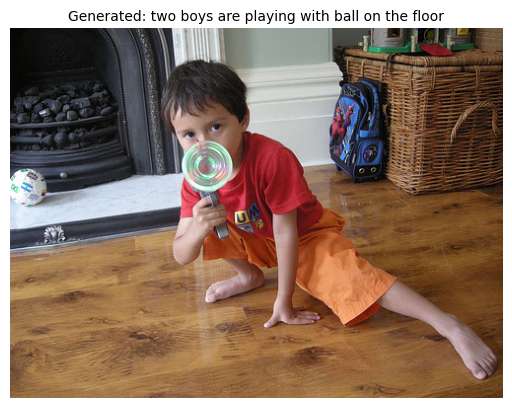

References:
 • A boy with a toy gun .
 • A little boy in orange shorts playing with a toy .
 • A young boy with his foot outstretched aims a toy at the camera in front of a fireplace .
 • A young child plays with his new light-up toy .
 • Boy with toy gun pointed at the camera .
--------------------------------------------------------------------------------


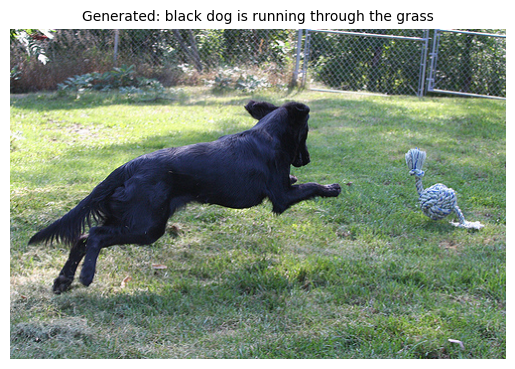

References:
 • a black dog jumping to catch a rope toy
 • A black dog playing fetch with a ball of rope .
 • A black dog pounces to get a rope toy .
 • A black dog running after his rope toy .
 • A large black dog is playing in a grassy yard .
--------------------------------------------------------------------------------


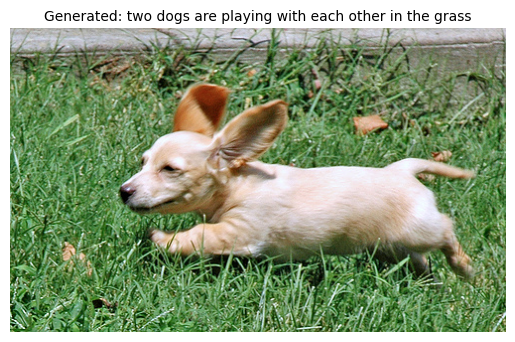

References:
 • A little tan dog with large ears running through the grass .
 • A playful dog is running through the grass .
 • A small dogs ears stick up as it runs in the grass .
 • The small dog is running across the lawn .
 • this is a small beige dog running through a grassy field
--------------------------------------------------------------------------------


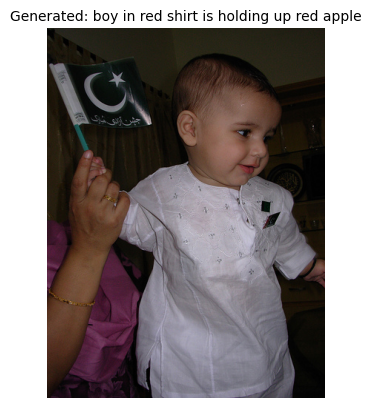

References:
 • A baby in a white garment holds a flag with crescent moon and star .
 • A baby is holding a small black flag with a moon and a star on it .
 • A baby wearing a white gown waves a Muslim flag .
 • A little toddler dressed in white is smiling while a lady helps him wave a flag .
 • Baby in white outfit holding black and white flag .
--------------------------------------------------------------------------------


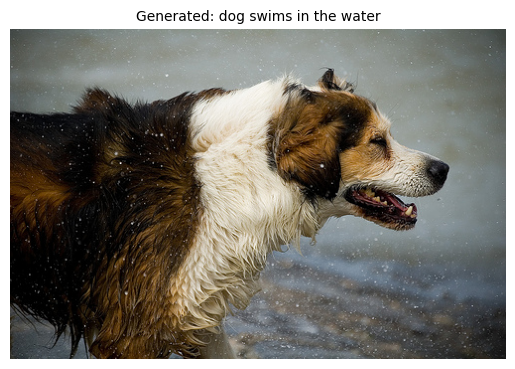

References:
 • A brown and white dog stands outside while it snows .
 • A dog is looking at something near the water .
 • A furry dog attempts to dry itself by shaking the water off its coat .
 • A white and brown dog shaking its self dry .
 • The large brown and white dog shakes off water .
--------------------------------------------------------------------------------


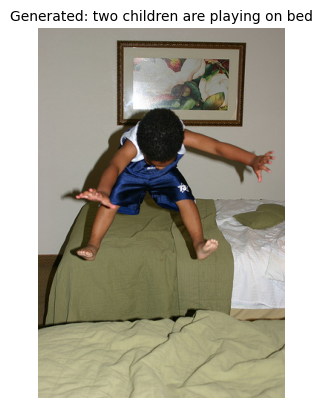

References:
 • A boy is jumping on a bed .
 • A boy jumped up from the green bed .
 • A boy jumps from one bed to another .
 • A small child is jumping on a bed .
 • The boy in blue shorts is bouncing on the bed .
--------------------------------------------------------------------------------
Image ID: 1056338697_4f7d7ce270
Beam Search Caption: young girl in pink shirt is standing in front of white truck
References: ['A blond woman in a blue shirt appears to wait for a ride .', 'A blond woman is on the street hailing a taxi .', 'A woman is signaling is to traffic , as seen from behind .', 'A woman with blonde hair wearing a blue tube top is waving on the side of the street .', 'The woman in the blue dress is holding out her arm at oncoming traffic .']
--------------------------------------------------
Image ID: 106490881_5a2dd9b7bd
Beam Search Caption: young boy in swim trunks is jumping off of the water
References: ['A boy in his blue swim shorts at the beach .', 'A boy smiles for th

In [24]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.sequence import pad_sequences
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction

wordtoix = word_to_index
ixtoword = index_to_word

with open(TEST_FEATURES_PATH, "rb") as f:
    encoded_test_features = pickle.load(f)

def greedy_search_caption(photo):
    caption = 'startseq'
    for _ in range(max_caption_length):
        seq = [word_to_index[word] for word in caption.split() if word in word_to_index]
        seq_padded = pad_sequences([seq], maxlen=max_caption_length, padding='post')
        predictions = model.predict([photo, seq_padded], verbose=0)
        predicted_index = np.argmax(predictions)
        predicted_word = index_to_word[predicted_index]
        caption += ' ' + predicted_word
        if predicted_word == 'endseq':
            break
    tokens = caption.split()

    tokens = tokens[1:-1] if tokens[-1] == 'endseq' else tokens[1:]
    return ' '.join(tokens)

sample_key = list(encoded_test_features.keys())[7]  # using the 8th image as an example
sample_photo_features = encoded_test_features[sample_key].reshape((1, 2048))
sample_image_path = os.path.join(IMAGE_DIR, sample_key + '.jpg')

sample_img = plt.imread(sample_image_path)
plt.imshow(sample_img)
plt.axis('off')
plt.title("Greedy Caption")
plt.show()
print("Greedy Caption:", greedy_search_caption(sample_photo_features))

with open(TEST_IMAGES_FILE, 'r') as f:
    test_filenames = set(f.read().strip().split('\n'))
test_ids = {os.path.splitext(fname)[0] for fname in test_filenames}
test_descriptions = {img_id: caps for img_id, caps in descriptions.items() if img_id in test_ids}
print("Loaded test descriptions:", len(test_descriptions))

smooth_fn = SmoothingFunction().method4
actual_greedy, predicted_greedy = [], []

for img_id in list(test_descriptions.keys())[:100]:
    references = [cap.split() for cap in test_descriptions[img_id]]
    photo_feature = encoded_test_features.get(img_id + '.jpg', encoded_test_features.get(img_id))
    if photo_feature is None:
        print(f"Missing feature for image ID: {img_id}")
        continue
    photo_feature = photo_feature.reshape((1, 2048))
    generated_caption = greedy_search_caption(photo_feature)
    candidate_tokens = generated_caption.split()
    actual_greedy.append(references)
    predicted_greedy.append(candidate_tokens)
    if len(predicted_greedy) <= 5:
        print("Image ID:", img_id)
        print("Greedy Generated Caption:", ' '.join(candidate_tokens))
        print("References:", [' '.join(ref) for ref in references])
        print("-" * 50)

print("Total Greedy Evaluated:", len(predicted_greedy))

if predicted_greedy:
    print('BLEU-1:', corpus_bleu(actual_greedy, predicted_greedy, weights=(1.0, 0, 0, 0), smoothing_function=smooth_fn))
    print('BLEU-2:', corpus_bleu(actual_greedy, predicted_greedy, weights=(0.5, 0.5, 0, 0), smoothing_function=smooth_fn))
    print('BLEU-3:', corpus_bleu(actual_greedy, predicted_greedy, weights=(0.33, 0.33, 0.33, 0), smoothing_function=smooth_fn))
    print('BLEU-4:', corpus_bleu(actual_greedy, predicted_greedy, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=smooth_fn))
else:
    print("No greedy predictions available to evaluate.")

exact_match_count = 0
for i in range(len(predicted_greedy)):
    candidate_str = ' '.join(predicted_greedy[i])
    reference_strs = [' '.join(ref) for ref in actual_greedy[i]]
    if candidate_str in reference_strs:
        exact_match_count += 1
exact_match_accuracy = exact_match_count / len(predicted_greedy) if predicted_greedy else 0
print('Exact Match Accuracy (Greedy):', exact_match_accuracy)

word_match_total = 0
word_count_total = 0
for i in range(len(predicted_greedy)):
    candidate = predicted_greedy[i]
    best_reference = max(actual_greedy[i], key=lambda ref: sum(1 for w1, w2 in zip(ref, candidate) if w1 == w2))
    matches = sum(1 for w1, w2 in zip(best_reference, candidate) if w1 == w2)
    word_match_total += matches
    word_count_total += max(len(candidate), len(best_reference))
word_level_accuracy = word_match_total / word_count_total if word_count_total > 0 else 0
print('Word-level Positional Accuracy (Greedy):', word_level_accuracy)

num_samples = 10
sample_count = 0

for img_id in test_descriptions:
    photo_feature = encoded_test_features.get(img_id + '.jpg', encoded_test_features.get(img_id))
    if photo_feature is None:
        continue
    photo_feature = photo_feature.reshape((1, 2048))
    generated_caption = greedy_search_caption(photo_feature)
    image_path = os.path.join(IMAGE_DIR, img_id + '.jpg')
    try:
        img = mpimg.imread(image_path)
    except FileNotFoundError:
        print(f"Image not found: {image_path}")
        continue
    plt.imshow(img)
    plt.axis('off')
    plt.title("Generated: " + generated_caption, fontsize=10)
    plt.show()
    print("References:")
    for ref in test_descriptions[img_id]:
        print(" •", ref)
    print("-" * 80)
    sample_count += 1
    if sample_count >= num_samples:
        break

def beam_search_caption(photo, beam_width=beam_k):
    start_seq = [word_to_index["startseq"]]
    sequences = [[start_seq, 0.0]]
    while len(sequences[0][0]) < max_caption_length:
        all_candidates = []
        for seq, score in sequences:
            seq_padded = pad_sequences([seq], maxlen=max_caption_length, padding='post')
            predictions = model.predict([photo, seq_padded], verbose=0)[0]
            top_indices = np.argsort(predictions)[-beam_width:]
            for idx in top_indices:
                candidate_seq = seq + [idx]
                candidate_score = score + np.log(predictions[idx] + 1e-10)
                all_candidates.append([candidate_seq, candidate_score])
        sequences = sorted(all_candidates, key=lambda item: item[1], reverse=True)[:beam_width]
    best_seq = sequences[0][0]
    caption_words = [index_to_word[i] for i in best_seq]
    caption_words = caption_words[1:]  # Remove the start token
    if "endseq" in caption_words:
        caption_words = caption_words[:caption_words.index("endseq")]
    return ' '.join(caption_words)

beam_actual, beam_predicted = [], []

for img_id in list(test_descriptions.keys())[:100]:
    references = [cap.split() for cap in test_descriptions[img_id]]
    photo_feature = encoded_test_features.get(img_id + '.jpg', encoded_test_features.get(img_id))
    if photo_feature is None:
        continue
    photo_feature = photo_feature.reshape((1, 2048))
    beam_caption = beam_search_caption(photo_feature, beam_width=beam_k)
    candidate_tokens = beam_caption.split()
    beam_actual.append(references)
    beam_predicted.append(candidate_tokens)
    if len(beam_predicted) <= 5:
        print("Image ID:", img_id)
        print("Beam Search Caption:", beam_caption)
        print("References:", [' '.join(ref) for ref in references])
        print("-" * 50)

print("Total Beam Search Evaluated:", len(beam_predicted))
if beam_predicted:
    print('BLEU-1 (Beam):', corpus_bleu(beam_actual, beam_predicted, weights=(1.0, 0, 0, 0), smoothing_function=smooth_fn))
    print('BLEU-2 (Beam):', corpus_bleu(beam_actual, beam_predicted, weights=(0.5, 0.5, 0, 0), smoothing_function=smooth_fn))
    print('BLEU-3 (Beam):', corpus_bleu(beam_actual, beam_predicted, weights=(0.33, 0.33, 0.33, 0), smoothing_function=smooth_fn))
    print('BLEU-4 (Beam):', corpus_bleu(beam_actual, beam_predicted, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=smooth_fn))
else:
    print("No valid beam search predictions to evaluate.")
